In [3]:
import tensorflow

In [4]:
import matplotlib.pyplot as plt
import numpy

In [5]:
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [15]:
(x_train, y_train),(x_test,y_test) = tensorflow.keras.datasets.cifar10.load_data()

In [16]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
x_train = numpy.array(x_train)
x_test = numpy.array(x_test)

50000
50000
10000
10000


In [17]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [18]:
print(x_train[0])
print(y_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


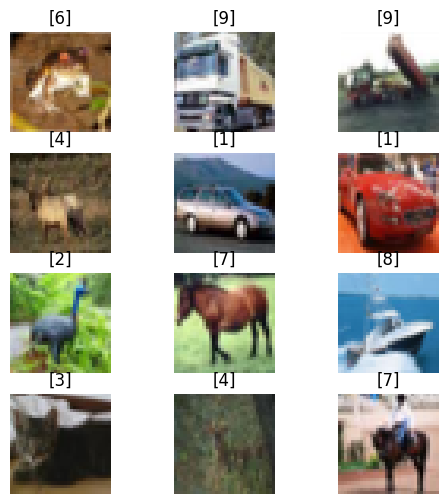

In [19]:
fig = plt.figure(figsize=(6.0,6.0))
rows=4
columns=3
for i in range(rows*columns):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis("off")

In [20]:
x_train = x_train/225
x_test = x_test/225

In [21]:
print(x_train[0])
print(y_train[0])

[[[0.26222222 0.27555556 0.28      ]
  [0.19111111 0.20444444 0.2       ]
  [0.22222222 0.21333333 0.19111111]
  ...
  [0.70222222 0.58666667 0.48      ]
  [0.67555556 0.55555556 0.45333333]
  [0.65777778 0.55111111 0.45777778]]

 [[0.07111111 0.08888889 0.08888889]
  [0.         0.         0.        ]
  [0.08       0.03555556 0.        ]
  ...
  [0.54666667 0.39111111 0.24444444]
  [0.52888889 0.36888889 0.22222222]
  [0.54222222 0.38666667 0.25333333]]

 [[0.11111111 0.10666667 0.09333333]
  [0.07111111 0.03111111 0.        ]
  [0.21777778 0.12       0.03555556]
  ...
  [0.52444444 0.37333333 0.22222222]
  [0.53333333 0.37333333 0.22222222]
  [0.48444444 0.32444444 0.18666667]]

 ...

 [[0.92444444 0.75555556 0.42666667]
  [0.89333333 0.68       0.15111111]
  [0.88       0.71555556 0.11555556]
  ...
  [0.71111111 0.59111111 0.31111111]
  [0.24888889 0.13777778 0.03111111]
  [0.23555556 0.15111111 0.08888889]]

 [[0.8        0.61777778 0.42666667]
  [0.76888889 0.54666667 0.18666667]


In [27]:
x_train.shape

(50000, 32, 32, 3)

In [35]:
model = Sequential()

In [36]:
model.add(Input(shape=(x_train.shape[1:])))

In [37]:
model.add(Conv2D(filters=6,kernel_size=(3,3),strides=2,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [38]:
model.add(Dense(224, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 15, 15, 6)         168       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 6)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 294)               0         
                                                                 
 dense_2 (Dense)             (None, 224)               66080     
                                                                 
 dense_3 (Dense)             (None, 10)                2250      
                                                                 
Total params: 68,498
Trainable params: 68,498
Non-trainable params: 0
__________________________________________________

In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [41]:
hist = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5838 - accuracy: 0.4367
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3413 - accuracy: 0.5308
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2526 - accuracy: 0.5617
Epoch 4/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1861 - accuracy: 0.5868
Epoch 5/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1333 - accuracy: 0.6057
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0811 - accuracy: 0.6230
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0329 - accuracy: 0.6407
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9888 - accuracy: 0.6547
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9455 - accuracy: 0.6727
Epoch 10/10
1563/1563 [==============================] - 17s 11ms

In [42]:
history = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1714 - accuracy: 0.6059


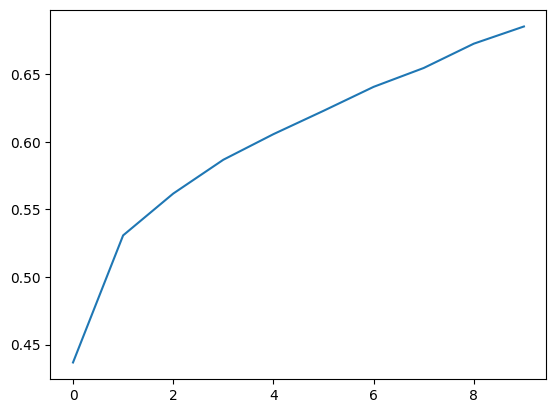

In [43]:
plt.plot(hist.epoch, hist.history['accuracy'])

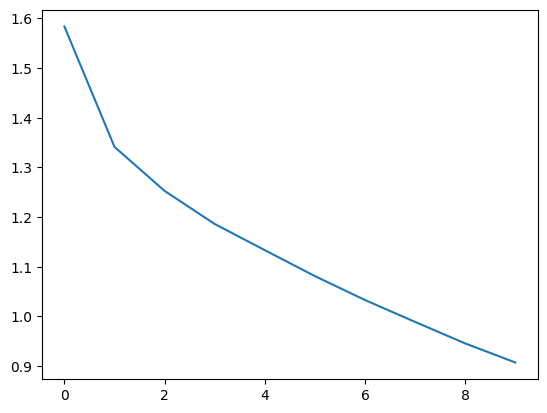

In [44]:
plt.plot(hist.epoch, hist.history['loss'])

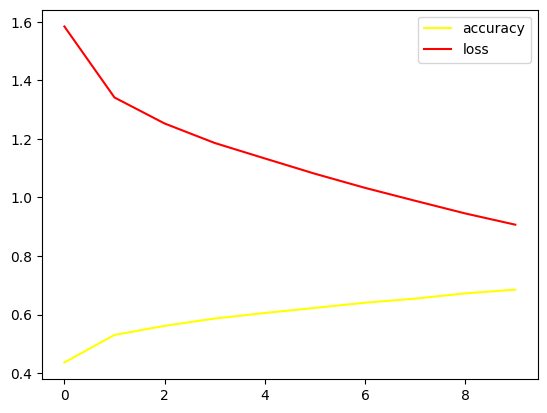

In [45]:
plt.plot(hist.history['accuracy'], c='yellow')
plt.plot(hist.history['loss'], c='red')
plt.legend(['accuracy','loss'])